In [1]:
from datetime import datetime, timedelta
import glob, os, sys
import logging

logging.basicConfig(level=logging.DEBUG)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import numpy as np
import pandas as pd
import xarray as xr

import iris

from icenet2.data.processors.cmip import IceNetCMIPPreProcessor
from icenet2.data.sic.mask import Masks
from icenet2.model.models import linear_trend_forecast
from icenet2.plotting.video import xarray_to_video

from IPython.display import HTML

2022-05-19 23:16:33.799574: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


In [2]:
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    
os.getcwd()

'/home/jambyr/code/ai-lab/icenet/IceNet-Pipeline'

In [3]:
cmip_sic = IceNetCMIPPreProcessor(
    "MRI-ESM2-0", "r1i1p1f1",
    ["siconca"],
    [],
    "cmip_lttest",
    pd.date_range("1988-1-1", "1991-8-31"),
    pd.date_range("1991-9-1", "1991-12-31"),
    [],
    linear_trends=["siconca"],
    linear_trend_days=30,
    north=True,
    south=False,
    update_key="siconca.{}.{}".format("MRI-ESM2-0", "r1i1p1f1"),
)
cmip_sic.init_source_data(
    lag_days=3,
    lead_days=30,
)
#cmip_sic.process()

DEBUG:root:./processed/cmip_lttest/cmip6.MRI-ESM2-0.r1i1p1f1 already exists
INFO:root:Processing 1339 dates for train category
INFO:root:Including lag of 3 days
INFO:root:Including lead of 30 days
INFO:root:Processing 122 dates for val category
INFO:root:Including lag of 3 days
INFO:root:Including lead of 30 days
INFO:root:No test dates for this processor
INFO:root:Got 1460 files for hus1000
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r

INFO:root:Got 1460 files for psl
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/psl/1988/1988_01_14.nc',
 './data/cmip6.MRI-ESM2-0

INFO:root:Got 1460 files for rlds
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rlds/1988/1988_01_14.nc',
 './data/c

INFO:root:Got 1460 files for rsds
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/rsds/1988/1988_01_14.nc',
 './data/c

INFO:root:Got 1460 files for siconca
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/

INFO:root:Got 1460 files for ta500
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/ta500/1988/1988_01_14.

INFO:root:Got 1460 files for tas
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tas/1988/1988_01_14.nc',
 './data/cmip6.MRI-ESM2-0

INFO:root:Got 1460 files for tos
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/tos/1988/1988_01_14.nc',
 './data/cmip6.MRI-ESM2-0

INFO:root:Got 1460 files for uas
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/uas/1988/1988_01_14.nc',
 './data/cmip6.MRI-ESM2-0

INFO:root:Got 1460 files for vas
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/vas/1988/1988_01_14.nc',
 './data/cmip6.MRI-ESM2-0

INFO:root:Got 1460 files for zg250
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg250/1988/1988_01_14.

INFO:root:Got 1460 files for zg500
DEBUG:root:FILES:
['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/zg500/1988/1988_01_14.

In [4]:
cmip_sic._var_files['siconca']

['./data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_01.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_02.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_03.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_04.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_05.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_06.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_07.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_08.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_09.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_10.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_11.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_12.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_13.nc',
 './data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1988/1988_01_14.nc',
 './data/cmip6.MRI-E

In [5]:
da = cmip_sic._open_dataarray_from_files("siconca")

INFO:root:Opening files for siconca
DEBUG:root:Files have var names siconca which will be renamed to siconca
DEBUG:root:1460 dates in da
INFO:root:Filtered to 1460 units long based on configuration requirements


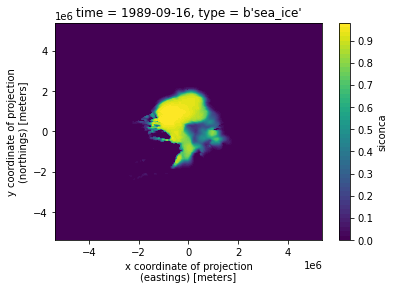

In [27]:
xr.plot.contourf(da.isel(time=259 + 365), levels=50)

In [7]:
da.data = np.asarray(da.data, dtype=cmip_sic._dtype)

In [8]:
da2 = cmip_sic.pre_normalisation("siconca", da)

DEBUG:root:./data/masks already exists


In [9]:
da3 = cmip_sic._build_linear_trend_da(da2, "siconca")

INFO:root:Generating 1489 trend dates
DEBUG:root:./data/masks already exists
INFO:root:Loaded 1489 entries from ./processed/cmip_lttest/cmip6.MRI-ESM2-0.r1i1p1f1/north/linear_trends/siconca.nc
INFO:root:Writing new trend cache for siconca


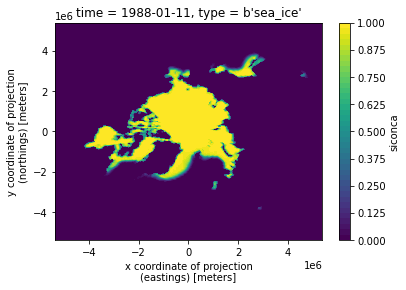

In [10]:
xr.plot.contourf(da3.isel(time=10), levels=50)

In [11]:
#anim = xarray_to_video(da3, 15, figsize=4)
#h5vid = anim.to_html5_video()


In [12]:
#HTML(h5vid)

In [21]:
dt = [datetime(1988, 9, 16)]
for i in range(3):
    print(i)
    dt.append(dt[i] + timedelta(days=365))

0
1
2


In [22]:
dt

[datetime.datetime(1988, 9, 16, 0, 0),
 datetime.datetime(1989, 9, 16, 0, 0),
 datetime.datetime(1990, 9, 16, 0, 0),
 datetime.datetime(1991, 9, 16, 0, 0)]

In [23]:
subset = da3.sel(time=dt)
anim = xarray_to_video(subset, 2, figsize=4)
h5vid = anim.to_html5_video()

INFO:root:Inspecting data
INFO:root:Initialising plot
INFO:root:Animating
INFO:root:Not saving plot, will return animation
DEBUG:root:Plotting 09/16/88
DEBUG:root:Plotting 09/16/88
DEBUG:root:Plotting 09/16/89
DEBUG:root:Plotting 09/16/90
DEBUG:root:Plotting 09/16/91


In [24]:
HTML(h5vid)

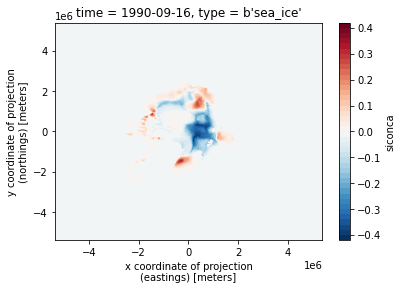

In [32]:
xr.plot.contourf(subset.isel(time=2) - da.isel(time=259 + 2 * 365), levels=50)